In [3]:
import numpy as np
from scipy import signal
import cmath
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [70]:
time_ = np.arange(0,1000.1,1.)
amp = 0.0

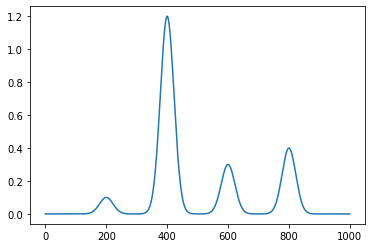

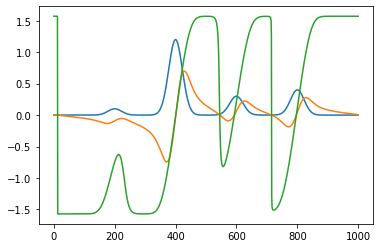

4


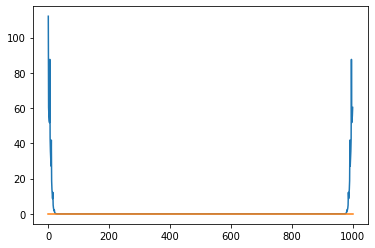

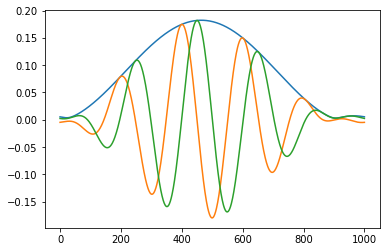

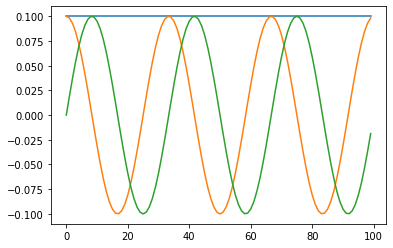

In [81]:
signal_1 = np.exp(- 0.001 * (400.-time_)**2)
for k in range(5):
    signal_1 += 0.1 * k * np.exp(- 0.001 * (200.*k-time_)**2)
for t in range(len(signal_1)):
    signal_1[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_1)
plt.show()

signal_1_hilbert = signal.hilbert(signal_1)
phase = np.zeros((signal_1.shape))
for t in range(len(phase)):
    phase[t] = cmath.phase(signal_1_hilbert[t])
    
plt.plot(time_, signal_1_hilbert.real)
plt.plot(time_, signal_1_hilbert.imag)
plt.plot(time_, phase)
plt.show()

fft_1 = fft(signal_1)
index_leading = fft_1[1:].argmax()
print(index_leading)
plt.plot(np.abs(fft_1).real)
plt.plot(np.abs(fft_1).imag)
plt.show()

back_trafo = fft_1.copy()
back_trafo[:index_leading] = 0.
back_trafo[index_leading+3:] = 0.

inverse_fft = ifft(back_trafo)
plt.plot(time_, abs(inverse_fft))
plt.plot(time_, inverse_fft.real)
plt.plot(time_, inverse_fft.imag)
plt.show()

target_fft = np.zeros(100)
target_fft[3] = 10
target_backtrafo = ifft(target_fft)
plt.plot(abs(target_backtrafo))
plt.plot(target_backtrafo.real)
plt.plot(target_backtrafo.imag)
plt.show()

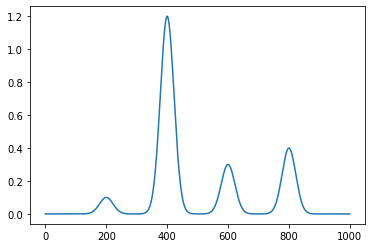

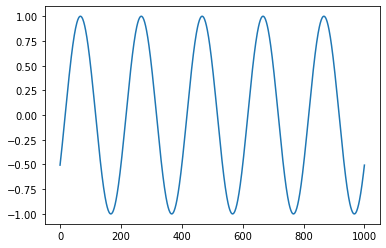

19.314552144295355


In [72]:
## DTW
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import array 
    
plt.plot(time_, signal_1)
plt.show()

period = 200.
amplitude = 1.
target_osc = np.sin( (period/2.) + (2.*np.pi*time_)/period)

plt.plot(time_, target_osc)
plt.show()

a1 = array.array('d',signal_1)
a2 = array.array('d',target_osc)
distance = dtw.distance_fast(a1, a2)
print(distance)

[(0, 0), (63, 100), (93, 200), (193, 220), (204, 314), (293, 337), (322, 417), (407, 467), (492, 517), (507, 613), (600, 637), (632, 713), (699, 759), (750, 818), (800, 881), (879, 917), (979, 979)]


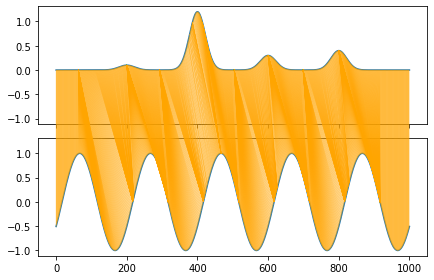

In [73]:
path = dtw.warping_path(a1[:1000], a2[:1000])
dtwvis.plot_warping(a1, a2, path)
print(path[::100])

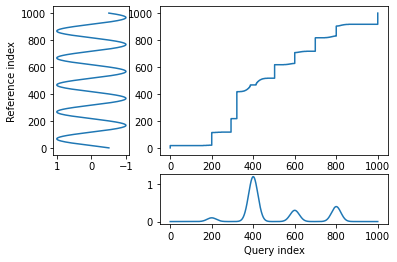

512.0578085992393


In [77]:
from dtw import *

alignment = dtw(a1, a2, keep_internals=True)
alignment.plot(type="threeway")


In [79]:
print(alignment.distance)
print(alignment.costMatrix)

512.0578085992393
[[5.06365641e-01 9.85395331e-01 1.43661633e+00 ... 6.36062198e+02
  6.36595400e+02 6.37101765e+02]
 [1.01273128e+00 1.46442502e+00 1.88783732e+00 ... 6.36065304e+02
  6.36598506e+02 6.37104871e+02]
 [1.51909692e+00 1.94345471e+00 2.33905831e+00 ... 6.36068410e+02
  6.36601611e+02 6.37107977e+02]
 ...
 [6.17959100e+02 5.91156850e+02 5.63854993e+02 ... 5.11012029e+02
  5.11545231e+02 5.12051597e+02]
 [6.18465465e+02 5.91635880e+02 5.64306214e+02 ... 5.11015135e+02
  5.11548337e+02 5.12054703e+02]
 [6.18971831e+02 5.92114910e+02 5.64757435e+02 ... 5.11018241e+02
  5.11551443e+02 5.12057809e+02]]
